In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import nan_euclidean_distances

In [2]:
data=pd.read_csv("data.csv", sep=',')
data_original = data.copy()
data.head()

,Unnamed: 0,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,WindDirection
0,20010601,87.0,15.6,18.5,NaN,4.0,4.0,8.0,0.6946,-1.7101,-0.6946,84.0,North
1,20010602,82.0,NaN,NaN,NaN,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0,North
2,20010603,92.0,15.3,17.6,19.5,2.0,NaN,NaN,2.9544,NaN,0.5209,82.0,East
3,20010604,114.0,16.2,19.7,NaN,1.0,1.0,0.0,NaN,0.3473,-0.1736,92.0,North
4,20010605,94.0,NaN,20.5,20.4,NaN,NaN,NaN,-0.5000,-2.9544,-4.3301,114.0,West


In [3]:
data.isnull().sum(axis = 0)

Unnamed: 0        0
maxO3            16
T9               37
T12              33
T15              37
Ne9              34
Ne12             42
Ne15             32
Vx9              18
Vx12             10
Vx15             21
maxO3v           12
WindDirection     0
dtype: int64

In [4]:
data = data.drop(columns=['WindDirection'])  ## 'Unnamed: 0',
data

,Unnamed: 0,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
0,20010601,87.0,15.6,18.5,NaN,4.0,4.0,8.0,0.6946,-1.7101,-0.6946,84.0
1,20010602,82.0,NaN,NaN,NaN,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0
2,20010603,92.0,15.3,17.6,19.5,2.0,NaN,NaN,2.9544,NaN,0.5209,82.0
3,20010604,114.0,16.2,19.7,NaN,1.0,1.0,0.0,NaN,0.3473,-0.1736,92.0
4,20010605,94.0,NaN,20.5,20.4,NaN,NaN,NaN,-0.5000,-2.9544,-4.3301,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...
107,20010925,NaN,13.3,NaN,17.8,3.0,5.0,NaN,0.0000,-1.0000,-1.2856,76.0
108,20010927,77.0,16.2,20.8,NaN,NaN,NaN,NaN,-0.6946,-2.0000,NaN,71.0
109,20010928,99.0,NaN,NaN,NaN,NaN,NaN,NaN,1.5000,0.8682,0.8682,NaN
110,20010929,83.0,NaN,NaN,NaN,NaN,5.0,3.0,-4.0000,-3.7588,-4.0000,99.0


In [5]:
imputed_data = data.copy()
for cols in imputed_data:
    nan_values = imputed_data[imputed_data[cols].isna()]
    for n_index, n_row in nan_values.iterrows():
        #print(n_row)
        nearest_distance = 99999999
        prev_index =-1
        final_index = -1
        for d_index, d_row in imputed_data.iterrows():
            if(n_row.equals(d_row)):
                #print('Divya')
                pass
            else:
                distance = nan_euclidean_distances([n_row],[d_row])
                if(distance < nearest_distance):
                    if(pd.isna(imputed_data.at[d_index,cols])):
                        final_index = prev_index                
                    else:
                        nearest_distance = distance
                        prev_index = d_index
                        final_index = d_index
        #print("dis    ", nearest_distance, "   n_index" , n_index,  "   d_index" , d_index ,"   final index" , final_index,"   pre  ", prev_index)
        imputed_data.at[n_index,cols]= imputed_data.at[final_index,cols]

In [6]:
imputed_data.isnull().sum(axis = 0)

Unnamed: 0    0
maxO3         0
T9            0
T12           0
T15           0
Ne9           0
Ne12          0
Ne15          0
Vx9           0
Vx12          0
Vx15          0
maxO3v        0
dtype: int64

In [7]:
data.isnull().sum(axis = 0)

Unnamed: 0     0
maxO3         16
T9            37
T12           33
T15           37
Ne9           34
Ne12          42
Ne15          32
Vx9           18
Vx12          10
Vx15          21
maxO3v        12
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


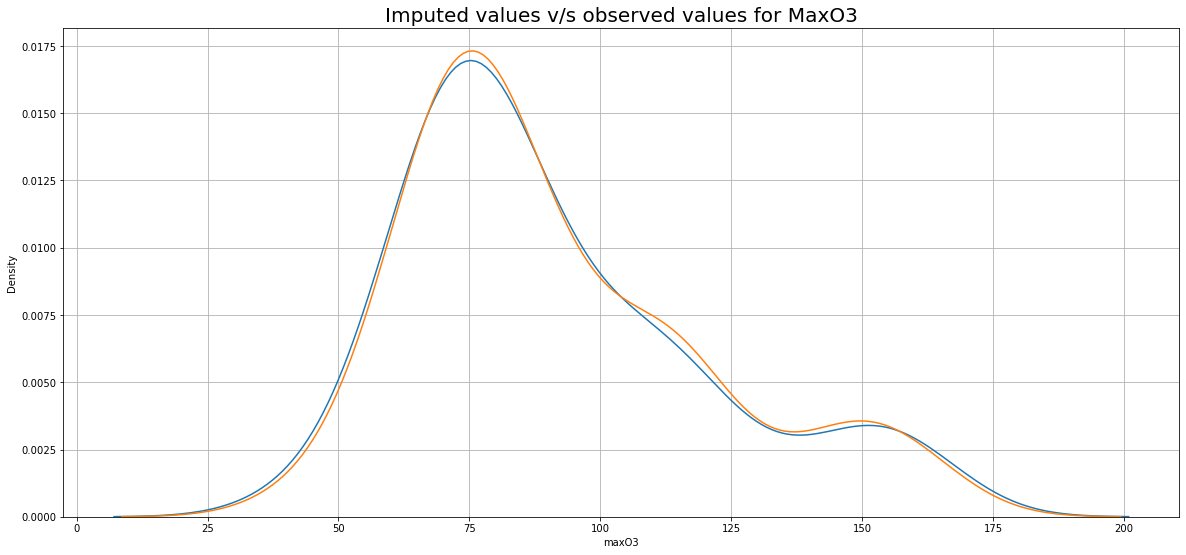

In [8]:
plt.figure(figsize=(20,9))
plt.title('Imputed values v/s observed values for MaxO3',fontsize=20)
sns.distplot(data[['maxO3']], hist =False)
sns.distplot(imputed_data[['maxO3']], hist =False)
plt.xlabel('maxO3')
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


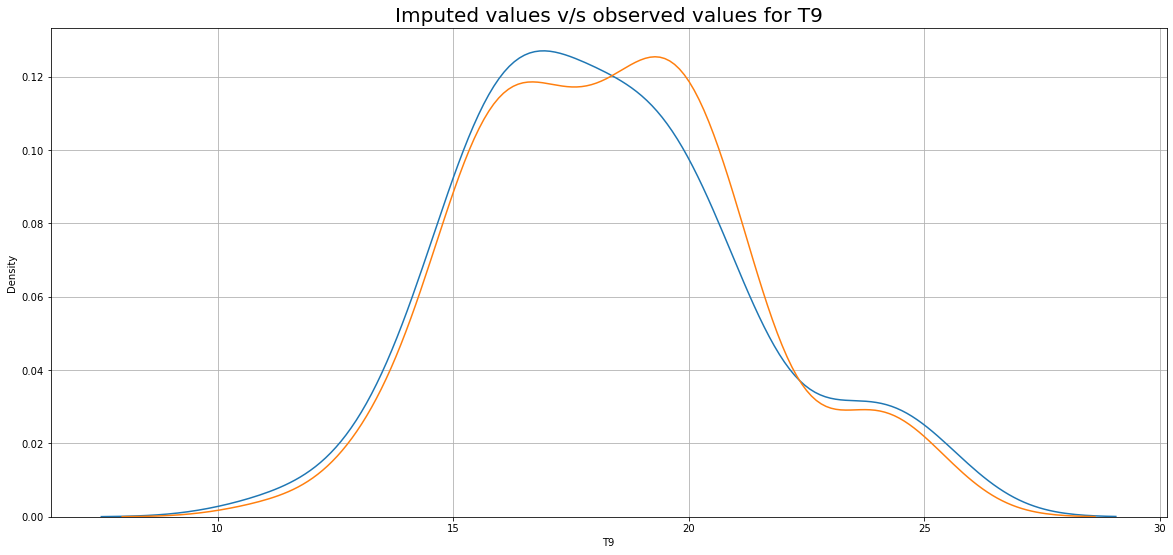

In [9]:
plt.figure(figsize=(20,9))
plt.title('Imputed values v/s observed values for T9',fontsize=20)
sns.distplot(data[['T9']], hist =False)
sns.distplot(imputed_data[['T9']], hist =False)
plt.xlabel('T9')
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


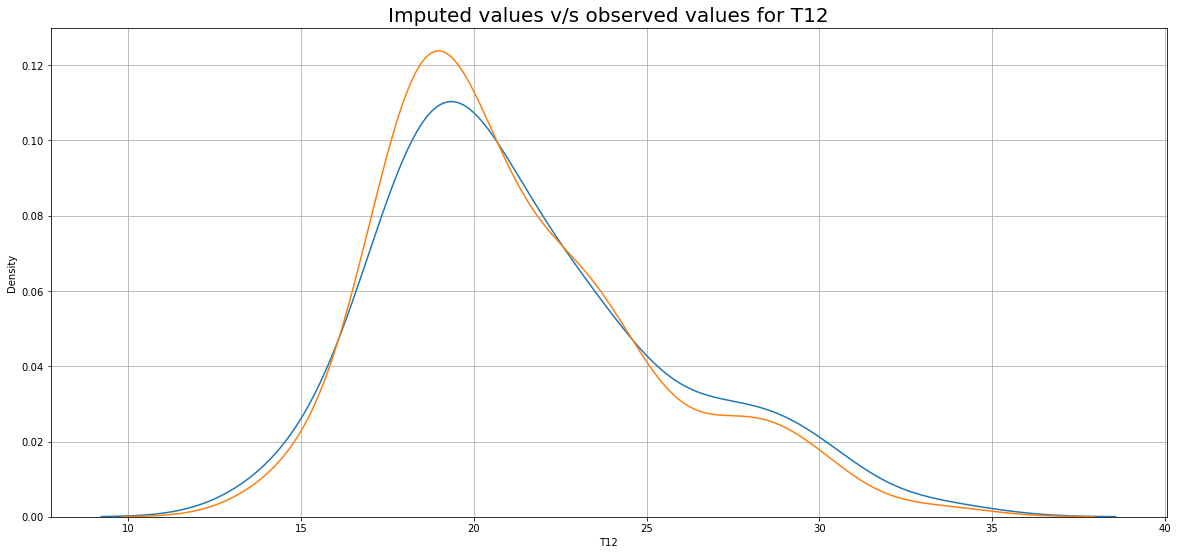

In [10]:
plt.figure(figsize=(20,9))
plt.title('Imputed values v/s observed values for T12',fontsize=20)
sns.distplot(data[['T12']], hist =False)
sns.distplot(imputed_data[['T12']], hist =False)
plt.xlabel('T12')
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


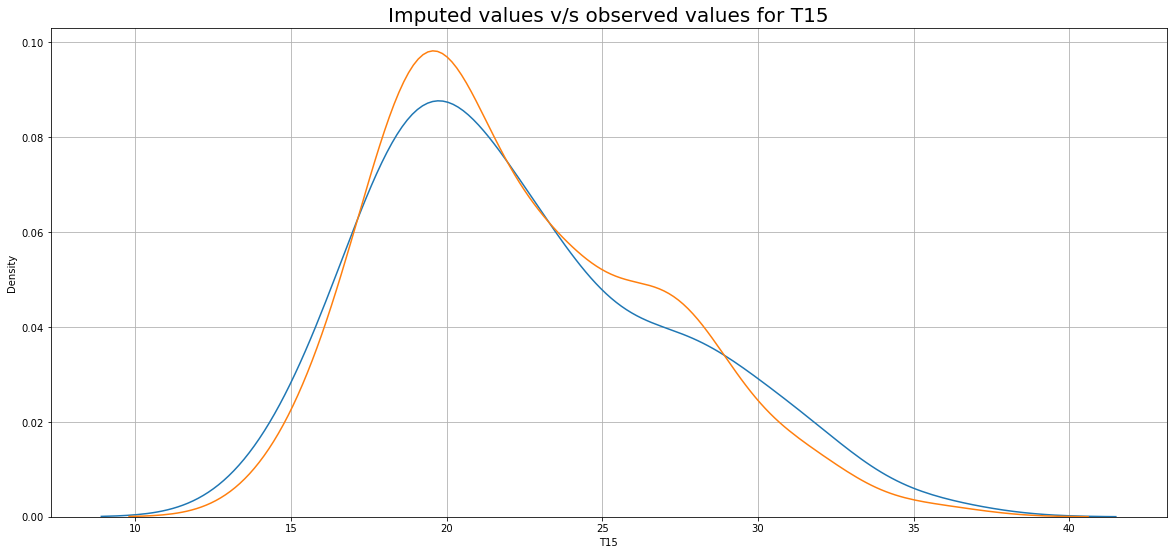

In [11]:
plt.figure(figsize=(20,9))
plt.title('Imputed values v/s observed values for T15',fontsize=20)
sns.distplot(data[['T15']], hist =False)
sns.distplot(imputed_data[['T15']], hist =False)
plt.xlabel('T15')
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


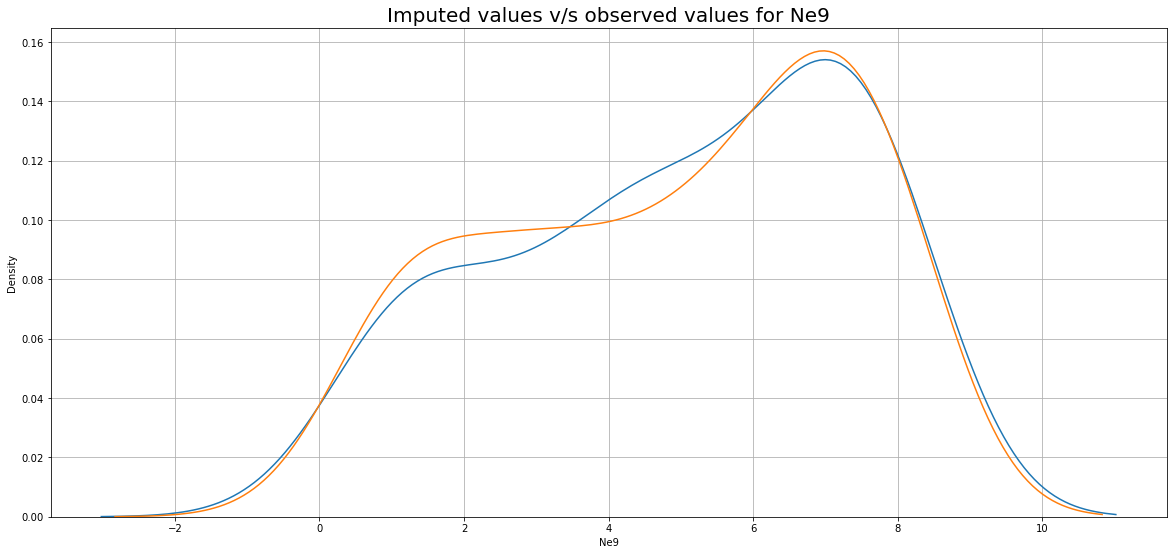

In [12]:
plt.figure(figsize=(20,9))
plt.title('Imputed values v/s observed values for Ne9',fontsize=20)
sns.distplot(data[['Ne9']], hist =False)
sns.distplot(imputed_data[['Ne9']], hist =False)
plt.xlabel('Ne9')
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


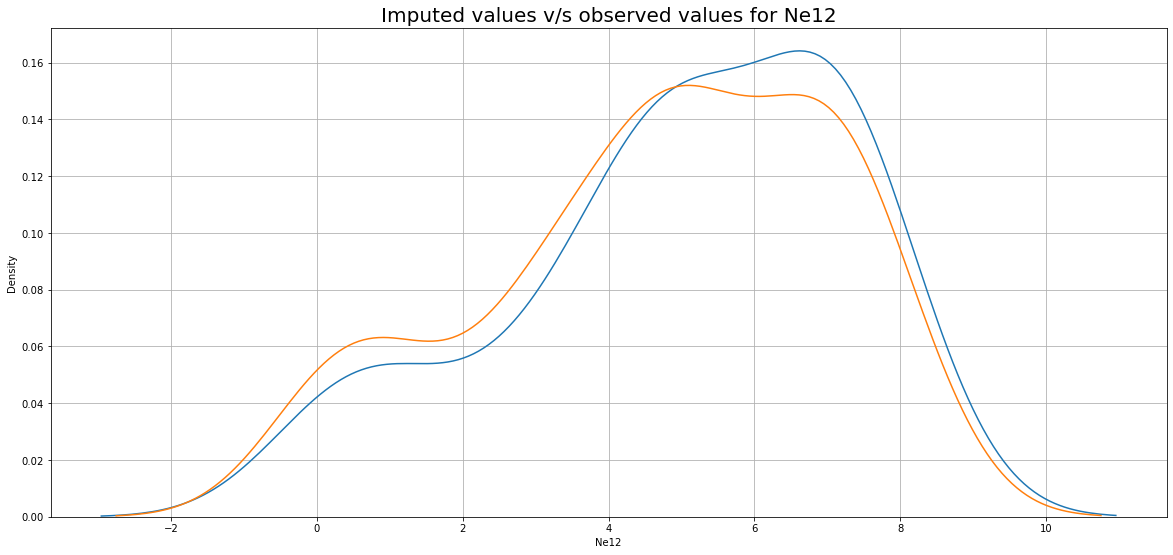

In [13]:
plt.figure(figsize=(20,9))
plt.title('Imputed values v/s observed values for Ne12',fontsize=20)
sns.distplot(data[['Ne12']], hist =False)
sns.distplot(imputed_data[['Ne12']], hist =False)
plt.xlabel('Ne12')
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


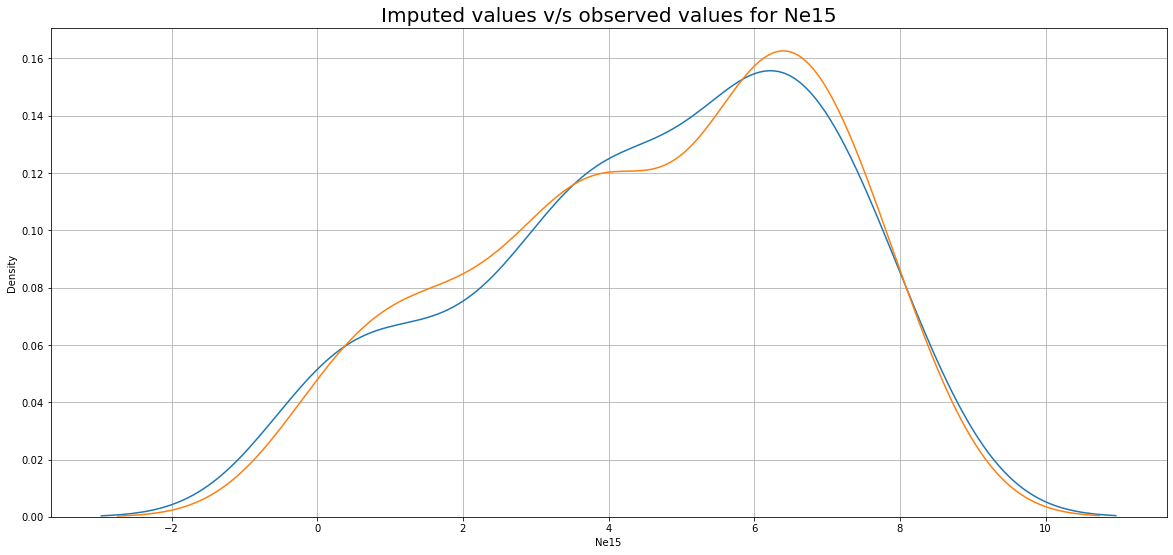

In [14]:
plt.figure(figsize=(20,9))
plt.title('Imputed values v/s observed values for Ne15',fontsize=20)
sns.distplot(data[['Ne15']], hist =False)
sns.distplot(imputed_data[['Ne15']], hist =False)
plt.xlabel('Ne15')
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


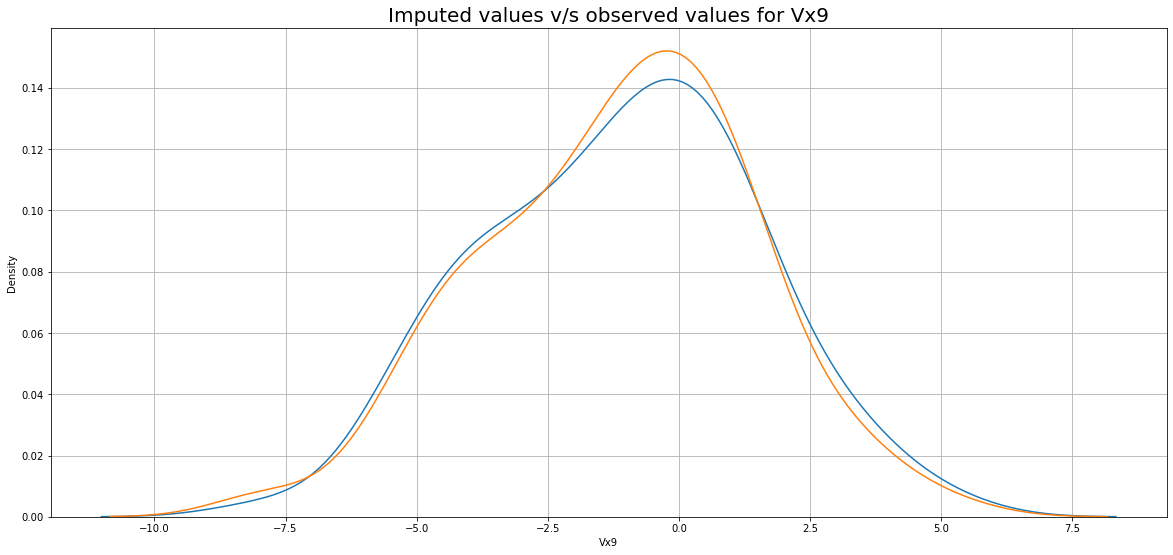

In [15]:
plt.figure(figsize=(20,9))
plt.title('Imputed values v/s observed values for Vx9',fontsize=20)
sns.distplot(data[['Vx9']], hist =False)
sns.distplot(imputed_data[['Vx9']], hist =False)
plt.xlabel('Vx9')
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


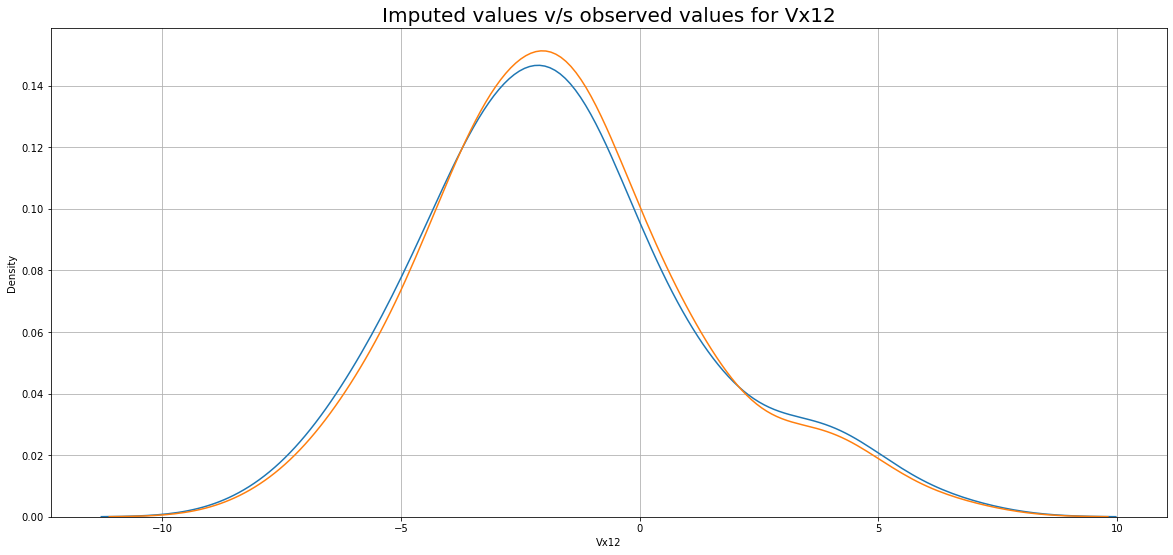

In [16]:
plt.figure(figsize=(20,9))
plt.title('Imputed values v/s observed values for Vx12',fontsize=20)
sns.distplot(data[['Vx12']], hist =False)
sns.distplot(imputed_data[['Vx12']], hist =False)
plt.xlabel('Vx12')
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


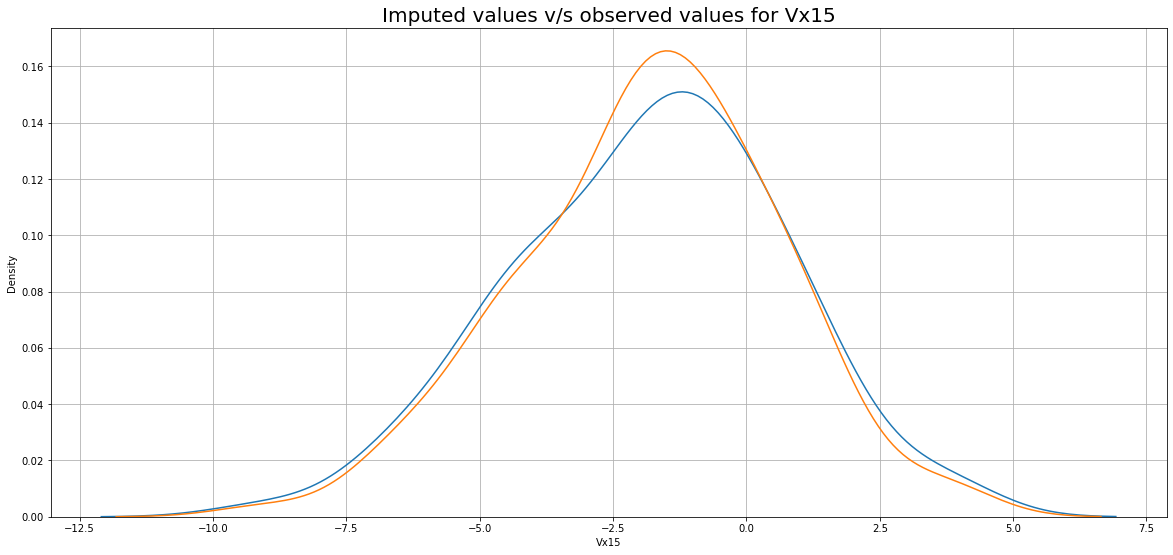

In [17]:
plt.figure(figsize=(20,9))
plt.title('Imputed values v/s observed values for Vx15',fontsize=20)
sns.distplot(data[['Vx15']], hist =False)
sns.distplot(imputed_data[['Vx15']], hist =False)
plt.xlabel('Vx15')
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


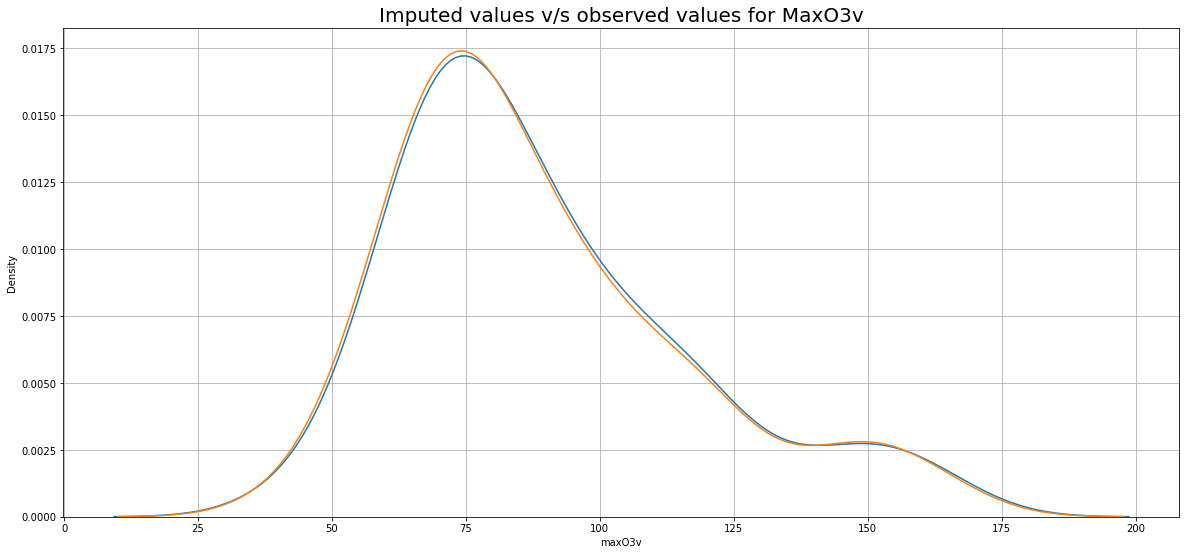

In [18]:
plt.figure(figsize=(20,9))
plt.title('Imputed values v/s observed values for MaxO3v',fontsize=20)
sns.distplot(data[['maxO3v']], hist =False)
sns.distplot(imputed_data[['maxO3v']], hist =False)
plt.xlabel('maxO3v')
plt.grid()
plt.show()